## CSCS530 Winter 2015
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2015)

  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2015
  * Schedule: Wednesdays and Friday, 1:00-2:30PM ET
  * Location: 120 West Hall (http://www.lsa.umich.edu/cscs/research/computerlab)
  * Teachers: [Mike Bommarito](https://www.linkedin.com/in/bommarito) and [Sarah Cherng](https://www.linkedin.com/pub/sarah-cherng/35/1b7/316)

#### [View this repository on NBViewer](http://nbviewer.ipython.org/github/mjbommar/cscs-530-w2015/tree/master/)


In [1]:
%matplotlib inline

# Imports
import copy
import networkx as nx
import numpy
import matplotlib.pyplot as plt
import pandas

import seaborn; seaborn.set()

# Import widget methods
from IPython.html.widgets import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Create a random graph
nodes = 100
edges = 2
prob_out = 0.25
g = nx.newman_watts_strogatz_graph(nodes, edges, prob_out)
print((g.number_of_nodes(), g.number_of_edges()))

(100, 131)


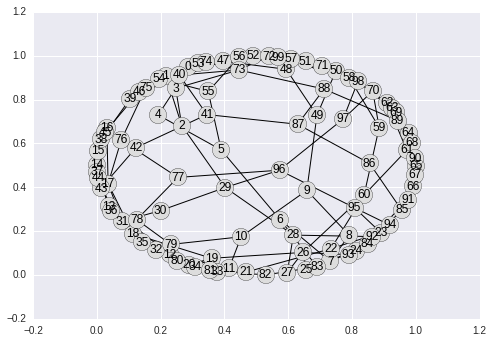

In [3]:
# Draw the random graph
g_layout = nx.spring_layout(g, iterations=100)
nx.draw_networkx(g, pos=g_layout, node_color='#dddddd')

In [12]:
# Pick a random person to infect initially
initial_infected = numpy.random.choice(g.nodes())

# Setup initial S/I/R states
for node_id in g.nodes():
    if node_id == initial_infected:
        g.node[node_id]["state"] = "I"
    else:
        g.node[node_id]["state"] = "S"

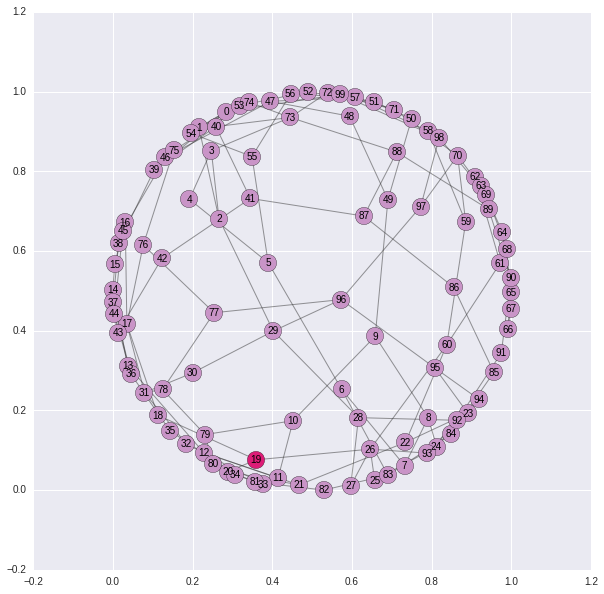

In [13]:
def draw_graph(g, g_layout):
    """
    Draw an SIR visualization.
    """
    # Now we can visualize the infected node's position
    node_map = {"S": [node_id for node_id in g.node if g.node[node_id]["state"] == "S"],
                "I": [node_id for node_id in g.node if g.node[node_id]["state"] == "I"],
                "R": [node_id for node_id in g.node if g.node[node_id]["state"] == "R"],
                }

    # Now we can visualize the infected node's position
    f = plt.figure(figsize=(10,10))
    nx.draw_networkx_nodes(g, g_layout,
                           nodelist=node_map["S"],
                           node_color="#c994c7")

    nx.draw_networkx_nodes(g, g_layout,
                           nodelist=node_map["I"],
                           node_color="#dd1c77")

    nx.draw_networkx_nodes(g, g_layout,
                           nodelist=node_map["R"],
                           node_color="#e7e1ef")

    nx.draw_networkx_edges(g, g_layout, 
                           width=1.0, 
                           alpha=0.5,
                           edge_color='#333333')

    _ = nx.draw_networkx_labels(g, g_layout,
                            dict(zip(g.nodes(), g.nodes())),
                            font_size=10)
    
    ax = f.gca()
    ax.set_aspect(1./ax.get_data_ratio())   

draw_graph(g, g_layout)

In [14]:
# Probability of infection per edge
prob_infection = 1.0
prob_recovery = 0.5

# Track graph history
g_history = [copy.deepcopy(g)]

# Now run the model 
max_steps = 50
for step in xrange(max_steps):
    # Store changes
    new_infected = []
    new_recovered = []
    
    # Iterate over I and infect any S neighbors
    for node_id in g.nodes():
        if g.node[node_id]["state"] == "I":
            # Infect connected persons with prob_infection rate
            neighbors = g.neighbors(node_id)
            for neighbor_id in neighbors:
                if g.node[neighbor_id]["state"] == "S" \
                    and numpy.random.random() <= prob_infection:
                    new_infected.append(neighbor_id)
            
            # Recover with some rate
            if numpy.random.random() <= prob_recovery:
                new_recovered.append(node_id)
    
    # Update graph
    for node_id in g.nodes():
        if node_id in new_recovered:
            g.node[node_id]["state"] = "R"
        elif node_id in new_infected:
            g.node[node_id]["state"] = "I"

    # Track the latest step
    g_history.append(copy.deepcopy(g))

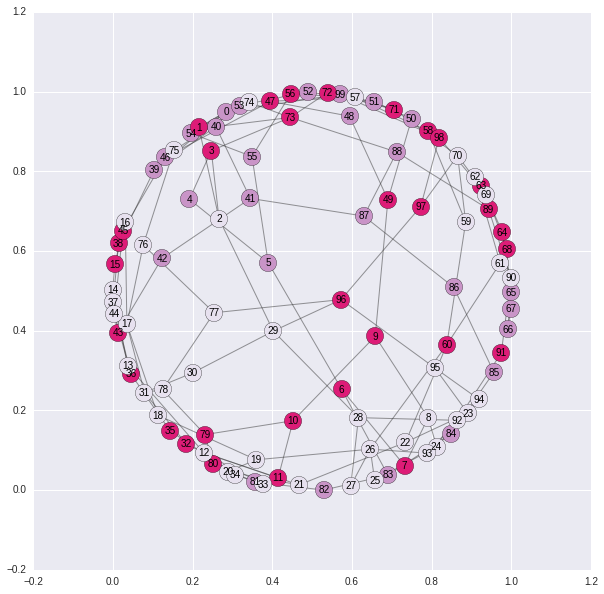

In [15]:
def display_graph_step(step=0):
    """
    Display a step from the graph history object.
    """
    draw_graph(g_history[step], g_layout)

interact(display_graph_step,
                step=IntSliderWidget(min=0, max=len(g_history)-1,
                                     step=1))